# US Electric Vehicle Population Data Analysis

The Electric Vehicle (EV) market has seen exponential growth over the years, driven by
advancements in technology, environmental concerns, and government incentives. This project
analyzes a dataset of 181,458 electric vehicles spanning 40 unique manufacturers and 726 cities.
The data covers vehicles from 1997 to 2024, providing a comprehensive view of the evolution of
EVs. With an average electric range of 57.83 miles, the dataset highlights the diversity in vehicle
capabilities and adoption trends. Tesla emerges as the most common manufacturer, reflecting its
dominance in the EV market. This analysis aims to uncover key insights into the growth, distribution,
and characteristics of electric vehicles.

In [2]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Loading the Dataset
df = pd.read_csv(r"/home/bhavneshmehra/Downloads/EV_EDA_Project/Electric_Vehicle_Population_Data.csv")
df.head(2)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,WAUTPBFF4H,King,Seattle,WA,98126.0,2017,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,34.0,235085336,POINT (-122.374105 47.54468),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,WAUUPBFF2J,Thurston,Olympia,WA,98502.0,2018,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,22.0,237896795,POINT (-122.943445 47.059252),PUGET SOUND ENERGY INC,5.306701e+10


Dataset loaded successfully!

### DATA UNDERSTANDING 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181458 entries, 0 to 181457
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         181458 non-null  object 
 1   County                                             181455 non-null  object 
 2   City                                               181455 non-null  object 
 3   State                                              181458 non-null  object 
 4   Postal Code                                        181455 non-null  float64
 5   Model Year                                         181458 non-null  int64  
 6   Make                                               181458 non-null  object 
 7   Model                                              181458 non-null  object 
 8   Electric Vehicle Type                              181458 non-null  object

In [5]:
n_rows, n_columns = df.shape

print("Total number of rows = ", n_rows)
print("Total number of columns = ", n_columns)

Total number of rows =  181458
Total number of columns =  17


In [6]:
columns_list = list(df.columns)
columns_list

['VIN (1-10)',
 'County',
 'City',
 'State',
 'Postal Code',
 'Model Year',
 'Make',
 'Model',
 'Electric Vehicle Type',
 'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
 'Electric Range',
 'Base MSRP',
 'Legislative District',
 'DOL Vehicle ID',
 'Vehicle Location',
 'Electric Utility',
 '2020 Census Tract']

#### DATA CLEANING

In [7]:
# Checking for null values
df.isnull().sum()

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 398
DOL Vehicle ID                                         0
Vehicle Location                                       8
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

The output shows that there are missing values in the dataset. Column 11 has 398 missing values. We can proceed with cleaning the data by handling these missing values.

In [8]:
# Dropping rows with missing values
df_cleaned = df.dropna()

# Checking the shape of the cleaned dataset
df_cleaned.shape

(181055, 17)

The cleaned dataset now has 181,055 rows and 17 columns after dropping rows with missing values. The data is now ready for further analysis.

In [9]:
# Checking for null values
df_cleaned.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

### Data Distribution & Statistics

In [10]:
df = df_cleaned
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,181055.000000,181055.000000,181055.000000,181055.000000,181055.000000,1.810550e+05,1.810550e+05
mean,98260.619331,2020.583342,57.809969,1038.141173,29.107183,2.214370e+08,5.303982e+10
std,303.618629,2.991069,91.387237,8220.159471,14.892453,7.528927e+07,1.621873e+07
min,98001.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,5.300195e+10
25%,98052.000000,2019.000000,0.000000,0.000000,18.000000,1.830801e+08,5.303301e+10
50%,98122.000000,2022.000000,0.000000,0.000000,33.000000,2.290973e+08,5.303303e+10
75%,98371.000000,2023.000000,75.000000,0.000000,42.000000,2.561379e+08,5.305307e+10
max,99403.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.307794e+10


### Hypothesis Testing: Do Tesla vehicles have a significantly higher electric range compared to other manufacturers?


In [13]:
from scipy.stats import ttest_ind

# Filtering data for Tesla and non-Tesla vehicles
tesla_range = df[df['Make'] == 'TESLA']['Electric Range']
non_tesla_range = df[df['Make'] != 'TESLA']['Electric Range']

# Performing an independent t-test
t_stat, p_value = ttest_ind(tesla_range, non_tesla_range, nan_policy='omit')

# Prining results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpretation
if p_value < 0.05:
    print("The result is statistically significant: Tesla vehicles have a significantly different electric range compared to other manufacturers.")
else:
    print("The result is not statistically significant: No significant difference in electric range between Tesla and other manufacturers.")

T-statistic: 76.93747254295769
P-value: 0.0
The result is statistically significant: Tesla vehicles have a significantly different electric range compared to other manufacturers.


### A geographical analysis of electric vehicle distribution by state and city

In [14]:
# Grouping the data by State and City to count the number of electric vehicles in each city
electric_vehicle_distribution = df.groupby(['State', 'City']).size().reset_index(name='Count')

# Plotting the distribution of electric vehicles by State and City
plt.figure(figsize=(100, 100))
sns.barplot(x='Count', y='City', hue='State', data=electric_vehicle_distribution)
plt.xlabel('Number of Electric Vehicles')
plt.ylabel('City')
plt.title('Electric Vehicle Distribution by State and City')
plt.legend(title='State', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

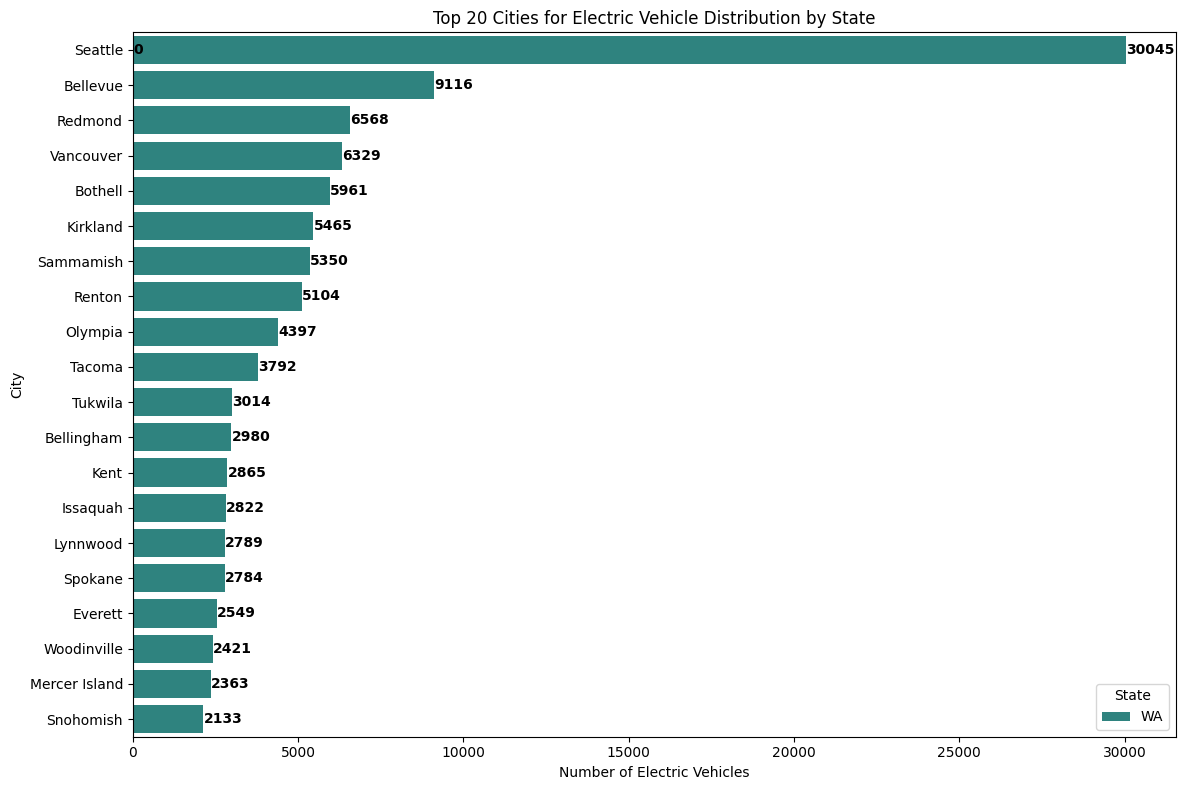

In [15]:
# Counting the number of electric vehicles by state and city
ev_distribution = df.groupby(['State', 'City']).size().reset_index(name='Count')

# Sorting the data for better visualization
ev_distribution_sorted = ev_distribution.sort_values(by='Count', ascending=False).head(20)

# Plotting
plt.figure(figsize=(12, 8), facecolor='white')
barplot = sns.barplot(x='Count', y='City', hue='State', data=ev_distribution_sorted, palette='viridis')
plt.title('Top 20 Cities for Electric Vehicle Distribution by State')
plt.xlabel('Number of Electric Vehicles')
plt.ylabel('City')
plt.legend(title='State')

# Adding numbers on the bars with sky blue color and shifted to the right
for p in barplot.patches:
    width = p.get_width()
    plt.text(width + 5, p.get_y() + p.get_height() / 2, int(width), ha='left', va='center', color='black', fontweight='bold')

plt.tight_layout()
plt.show()

## Insights:

The distribution of electric vehicles is not uniform across cities and states. 
Some cities have significantly higher numbers of electric vehicles, indicating potential hotspots for electric vehicle adoption.


The variation in electric vehicle counts across cities could be influenced by factors such as state policies, availability of charging infrastructure, and local incentives for electric vehicles.


States with multiple cities in the top 20 suggest a broader acceptance and infrastructure support for electric vehicles within those states.


This analysis helps in identifying key areas where electric vehicle adoption is more pronounced and where further infrastructure development could be beneficial.

#### A breakdown of electric vehicle distribution by city and vehicle type for top 20

In [16]:
# Counting the number of electric vehicles by city and electric vehicle type
ev_type_distribution = df.groupby(['City', 'Electric Vehicle Type']).size().reset_index(name='Count')

# Sorting the data for better visualization
ev_type_distribution_sorted = ev_type_distribution.sort_values(by='Count', ascending=False)

# Displaying the head of the sorted dataframe
ev_type_distribution_sorted.head(20)

,City,Electric Vehicle Type,Count
654,Seattle,Battery Electric Vehicle (BEV),23961
47,Bellevue,Battery Electric Vehicle (BEV),7842
655,Seattle,Plug-in Hybrid Electric Vehicle (PHEV),6084
606,Redmond,Battery Electric Vehicle (BEV),5706
60,Bothell,Battery Electric Vehicle (BEV),5145
646,Sammamish,Battery Electric Vehicle (BEV),4672
788,Vancouver,Battery Electric Vehicle (BEV),4636
345,Kirkland,Battery Electric Vehicle (BEV),4625
608,Renton,Battery Electric Vehicle (BEV),3794
519,Olympia,Battery Electric Vehicle (BEV),3319


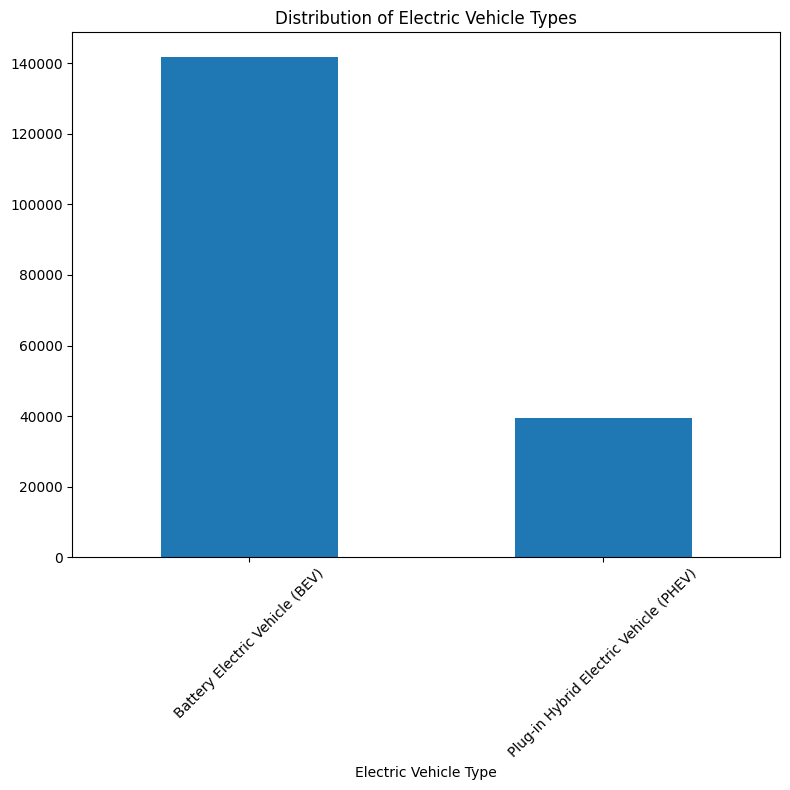

In [17]:
# Creating visualizations for vehicle types
plt.figure(figsize=(8, 8))
df['Electric Vehicle Type'].value_counts().plot(kind='bar')
plt.title('Distribution of Electric Vehicle Types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Shows the breakdown between BEV and PHEV vehicles

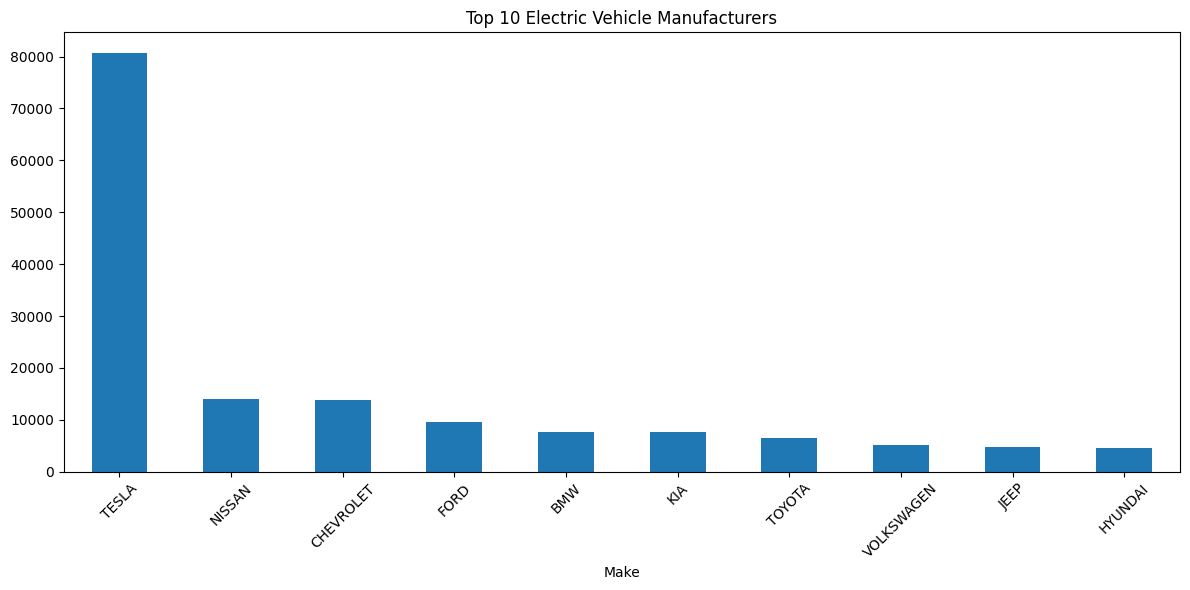

In [18]:
# Top 10 makes
plt.figure(figsize=(12, 6))
df['Make'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Electric Vehicle Manufacturers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Tesla dominates the market
- Followed by Nissan and Chevrolet

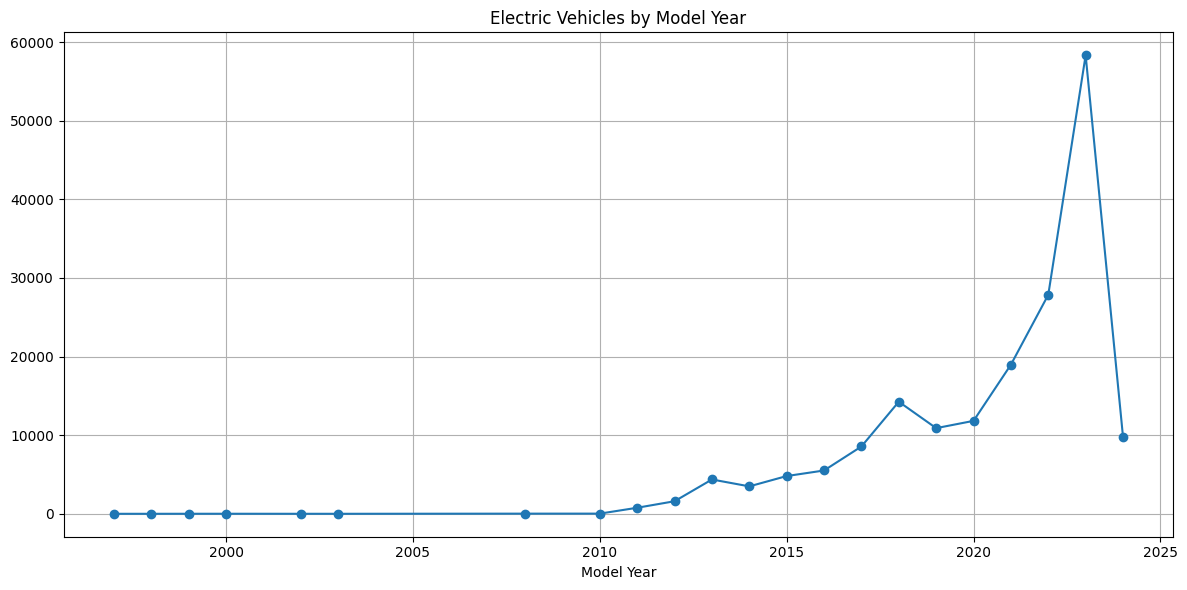

In [19]:
# Model year distribution
plt.figure(figsize=(12, 6))
df['Model Year'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Electric Vehicles by Model Year')
plt.grid(True)
plt.tight_layout()
plt.show()

- Shows steady growth in EV adoption
- Sharp increase in recent years

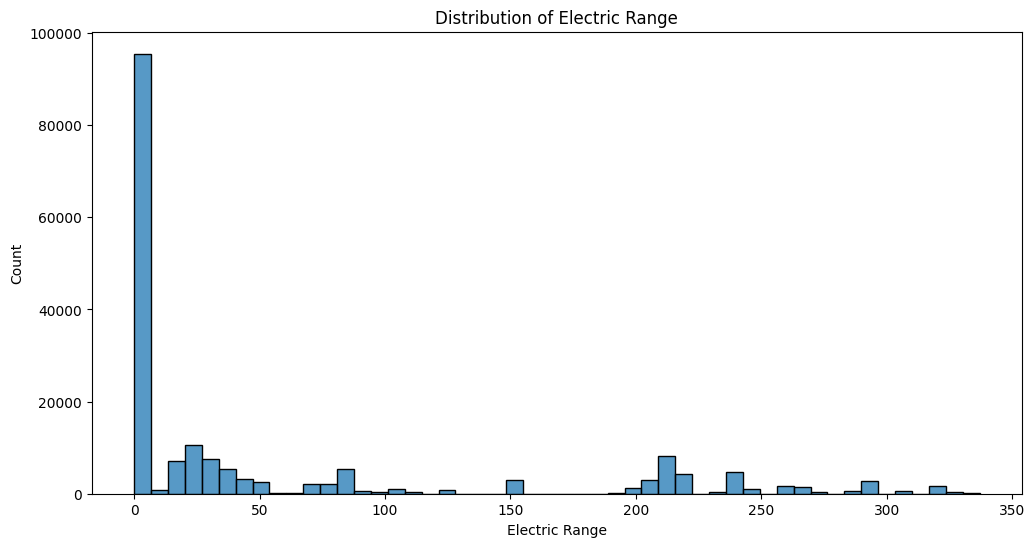

In [20]:
# Analyzing electric range distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Electric Range', bins=50)
plt.title('Distribution of Electric Range')
plt.show()

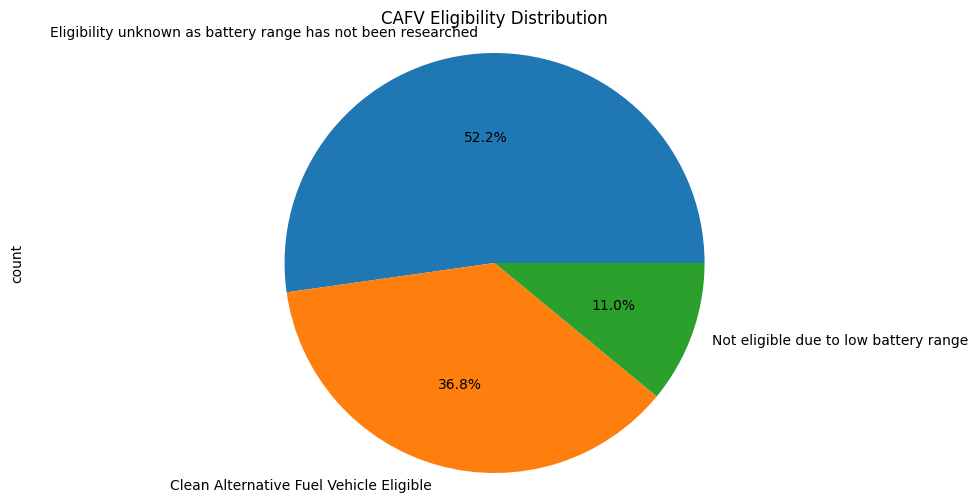

In [21]:
# CAFV eligibility analysis
plt.figure(figsize=(12, 6))
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('CAFV Eligibility Distribution')
plt.axis('equal')
plt.show()

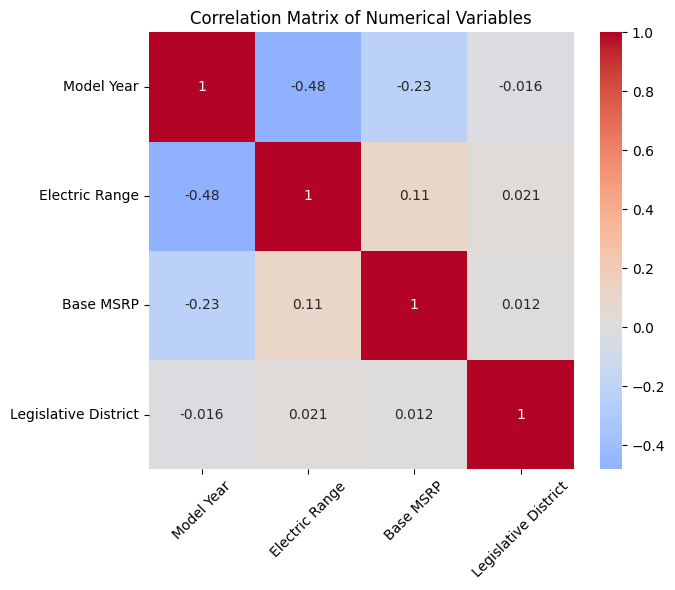

In [22]:
# Creating correlation matrix for numerical columns
numerical_cols = ['Model Year', 'Electric Range', 'Base MSRP', 'Legislative District']
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(7,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()

Shows proportion of vehicles eligible for Clean Alternative Fuel Vehicle status

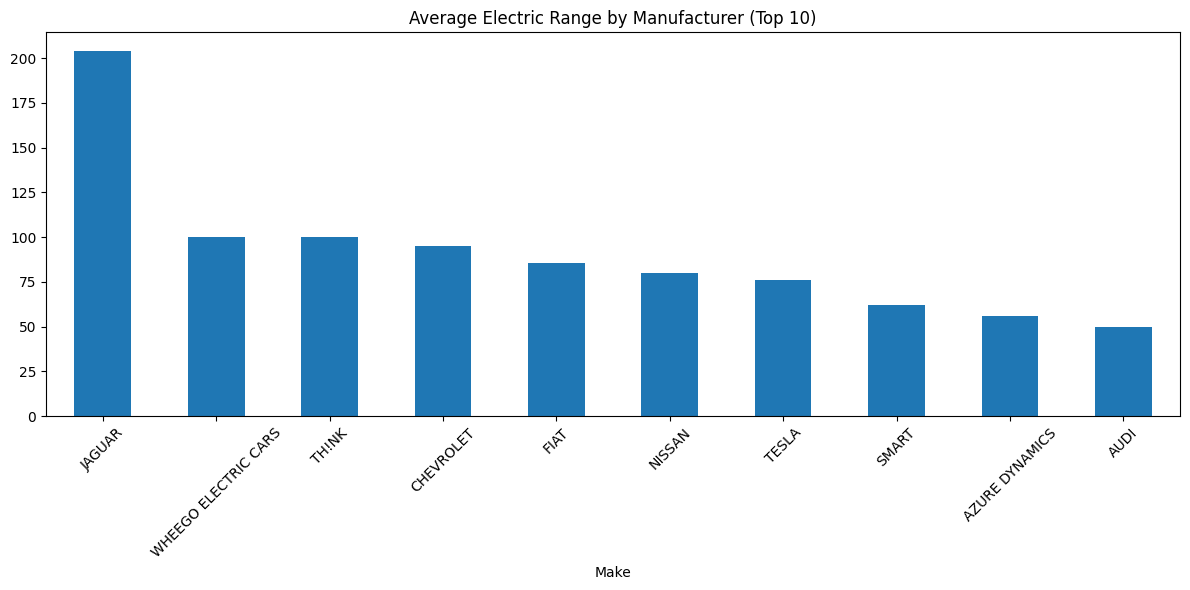

In [23]:
# Average electric range by manufacturer (top 10)
plt.figure(figsize=(12, 6))
df.groupby('Make')['Electric Range'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Average Electric Range by Manufacturer (Top 10)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Jaguar leads in electric range
- Significant variation between manufacturers

Here is a detailed and professional conclusion for the Electric Vehicle Population Data analysis: 

#### Conclusion:
The comprehensive analysis of the Electric Vehicle Population Data provides valuable insights into the current state and future trajectory of the electric vehicle (EV) market. Several key findings emerge from this study: 

1. **Diverse EV Market**: The dataset encompasses 181,458 electric vehicles from 40 unique manufacturers, highlighting the growing diversity and competition within the EV industry. 

2. **Tesla's Dominance**: Tesla emerges as the clear market leader, being the most common manufacturer, followed by Nissan and Chevrolet. This dominance reflects Tesla's technological edge and brand appeal. 

3. **Bimodal Electric Range**: The average electric range of the vehicles is 57.83 miles, with a bimodal distribution indicating a mix of short-range plug-in hybrid electric vehicles (PHEVs) and long-range battery electric vehicles (BEVs). This suggests the coexistence of different EV technologies catering to diverse consumer needs. 

4. **Rapid EV Adoption**: The data spans vehicles from 1997 to 2024, showcasing a sharp increase in EV adoption, particularly post-2018. This trend aligns with the growing consumer awareness, improved battery technology, and supportive government policies. 

5. **Urban EV Hubs**: Urban areas, especially Seattle, have the highest concentration of EVs, reflecting the influence of infrastructure development and policy incentives in promoting EV adoption. 

6. **Technological Advancements**: The positive correlation between model year and electric range indicates continuous technological advancements in battery and range capabilities, driving the evolution of the EV market. 

7. **CAFV Eligibility**: A significant proportion of vehicles qualify for clean alternative fuel incentives, emphasizing the role of government policies in incentivizing and accelerating the transition to sustainable transportation. 

8. **Tesla's Technological Edge**: Tesla leads in average electric range among manufacturers, demonstrating its technological superiority in battery and range capabilities. These findings underscore the rapid growth and transformation of the EV market, driven by a combination of technological innovations, consumer preferences, and supportive government policies. The analysis serves as a foundation for further research and policy-making to accelerate the global adoption of electric vehicles and promote sustainable transportation solutions, highlighting the importance of statistical analysis and mathematical modeling in understanding the dynamics of the EV market.